In [1]:
#This model should predict the price of the stock for the next day by using random forest model 
#and also backtesting

In [2]:
#import libs
import yfinance as yf


In [3]:
#init Ticker Class
aapl = yf.Ticker("AAPL")

In [4]:
#init history period max
aapl = aapl.history(period="max")

In [5]:

aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-06 00:00:00-05:00,153.789993,156.300003,153.460007,153.830002,87558000,0.0,0.0
2023-03-07 00:00:00-05:00,153.699997,154.029999,151.130005,151.600006,56182000,0.0,0.0
2023-03-08 00:00:00-05:00,152.809998,153.470001,151.830002,152.869995,47204800,0.0,0.0


In [6]:
#show the index of the data
aapl.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2023-02-27 00:00:00-05:00', '2023-02-28 00:00:00-05:00',
               '2023-03-01 00:00:00-05:00', '2023-03-02 00:00:00-05:00',
               '2023-03-03 00:00:00-05:00', '2023-03-06 00:00:00-05:00',
               '2023-03-07 00:00:00-05:00', '2023-03-08 00:00:00-05:00',
               '2023-03-09 00:00:00-05:00', '2023-03-10 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10650, freq=None)

<AxesSubplot:xlabel='Date'>

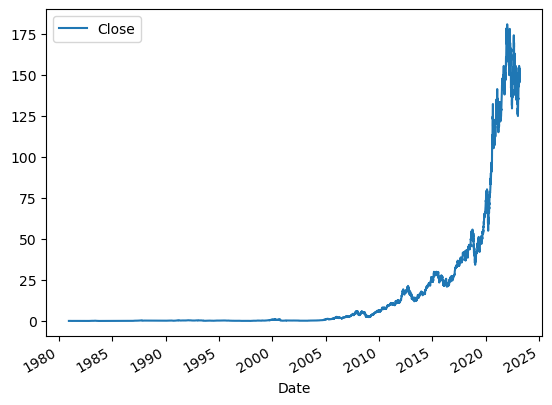

In [7]:
#plot the data
aapl.plot.line(y="Close", use_index=True)

In [8]:
#start data cleaning
del aapl["Dividends"]
del aapl["Stock Splits"]

In [9]:
#use shift to create the col tomorrow
aapl["Tomorrow"] = aapl["Close"].shift(-1)

In [10]:
aapl

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.094519
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.087582
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.089749
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.092351
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.097987
...,...,...,...,...,...,...
2023-03-06 00:00:00-05:00,153.789993,156.300003,153.460007,153.830002,87558000,151.600006
2023-03-07 00:00:00-05:00,153.699997,154.029999,151.130005,151.600006,56182000,152.869995
2023-03-08 00:00:00-05:00,152.809998,153.470001,151.830002,152.869995,47204800,150.589996


In [11]:
#setup the target, target bool, but use astype to convert bol to int
aapl["Target"] = (aapl["Tomorrow"] > aapl["Close"]).astype(int)

In [12]:
aapl

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.094519,0
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.087582,0
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.089749,1
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.092351,1
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.097987,1
...,...,...,...,...,...,...,...
2023-03-06 00:00:00-05:00,153.789993,156.300003,153.460007,153.830002,87558000,151.600006,0
2023-03-07 00:00:00-05:00,153.699997,154.029999,151.130005,151.600006,56182000,152.869995,1
2023-03-08 00:00:00-05:00,152.809998,153.470001,151.830002,152.869995,47204800,150.589996,0


In [13]:
#We won't like to go too far back, bc the market can make a 
#big leap in the history, so clean the data
aapl = aapl.loc["1990-01-01":].copy()

In [14]:
aapl

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.250282,0.266257,0.248507,0.264482,183198400,0.266257,1
1990-01-03 00:00:00-05:00,0.269808,0.269808,0.266257,0.266257,207995200,0.267145,1
1990-01-04 00:00:00-05:00,0.271583,0.275132,0.264482,0.267145,221513600,0.268033,1
1990-01-05 00:00:00-05:00,0.268033,0.271583,0.262707,0.268033,123312000,0.269808,1
1990-01-08 00:00:00-05:00,0.266257,0.269808,0.262707,0.269808,101572800,0.267145,0
...,...,...,...,...,...,...,...
2023-03-06 00:00:00-05:00,153.789993,156.300003,153.460007,153.830002,87558000,151.600006,0
2023-03-07 00:00:00-05:00,153.699997,154.029999,151.130005,151.600006,56182000,152.869995,1
2023-03-08 00:00:00-05:00,152.809998,153.470001,151.830002,152.869995,47204800,150.589996,0


In [15]:
#start the train the model estimators can be higher, min_simples_split protect from the overfitting? Use random_state

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = aapl.iloc[:-100]
test = aapl.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
#Measure the accuracy 
from sklearn.metrics import precision_score

#precision score
preds = model.predict(test[predictors])

In [17]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [18]:
preds

Date
2022-10-17 00:00:00-04:00    1
2022-10-18 00:00:00-04:00    1
2022-10-19 00:00:00-04:00    1
2022-10-20 00:00:00-04:00    1
2022-10-21 00:00:00-04:00    1
                            ..
2023-03-06 00:00:00-05:00    0
2023-03-07 00:00:00-05:00    1
2023-03-08 00:00:00-05:00    1
2023-03-09 00:00:00-05:00    1
2023-03-10 00:00:00-05:00    1
Length: 100, dtype: int64

In [19]:
precision_score(test["Target"], preds)

0.5342465753424658

In [20]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

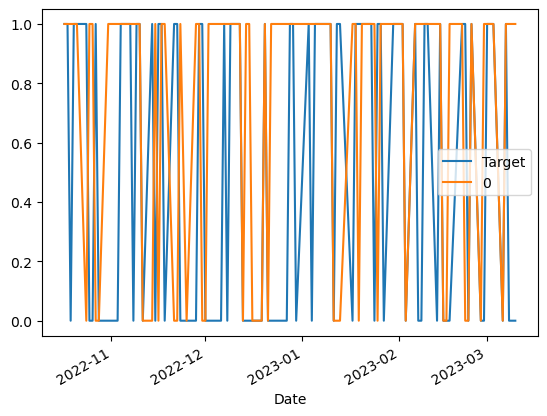

In [21]:
combined.plot()

In [22]:
#Building Backtesting

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
#1 years = 250 trading days
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
        
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [24]:
# start backtesting
predictions = backtest(aapl, model, predictors)

In [25]:
# count each type of predictions was made

predictions["Predictions"].value_counts()

0    3948
1    1914
Name: Predictions, dtype: int64

In [26]:
#look at precision score

precision_score(predictions["Target"], predictions["Predictions"])

0.5156739811912225

In [27]:
#natural percentage 

predictions["Target"].value_counts() / predictions.shape[0]

1    0.520641
0    0.479359
Name: Target, dtype: float64

In [28]:
#calculate mean and then find ratios-> market gone up for a while -> go down soon
#last week, 3months, 1year, 4years
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = aapl.rolling(horizon).mean()
    
    ratio_column = f"Close_Ration_{horizon}"
    aapl[ratio_column] = aapl["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    aapl[trend_column] = aapl.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [29]:
aapl

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_5,Trend_5,Close_Ration_60,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,0.250282,0.266257,0.248507,0.264482,183198400,0.266257,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,0.269808,0.269808,0.266257,0.266257,207995200,0.267145,1,1.003344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,0.271583,0.275132,0.264482,0.267145,221513600,0.268033,1,1.001665,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,0.268033,0.271583,0.262707,0.268033,123312000,0.269808,1,1.001658,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,0.266257,0.269808,0.262707,0.269808,101572800,0.267145,0,1.003300,2.0,1.009967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-06 00:00:00-05:00,153.789993,156.300003,153.460007,153.830002,87558000,151.600006,0,1.009185,2.0,1.034513,3.0,1.088351,33.0,1.026289,128.0,1.343715,529.0
2023-03-07 00:00:00-05:00,153.699997,154.029999,151.130005,151.600006,56182000,152.869995,1,0.992699,1.0,1.013803,3.0,1.071200,33.0,1.011543,128.0,1.323010,528.0
2023-03-08 00:00:00-05:00,152.809998,153.470001,151.830002,152.869995,47204800,150.589996,0,1.004171,1.0,1.012062,4.0,1.078848,33.0,1.020265,128.0,1.332840,529.0


In [30]:
aapl = aapl.dropna()

In [31]:
aapl

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_5,Trend_5,Close_Ration_60,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,0.216717,0.220421,0.214865,0.215791,293664000,0.220421,1,0.993604,1.0,0.978993,1.0,1.007241,22.0,0.694753,111.0,0.637248,462.0
1993-12-15 00:00:00-05:00,0.214865,0.220421,0.214865,0.220421,123883200,0.217643,0,1.010615,1.0,1.014493,2.0,1.025699,23.0,0.711547,111.0,0.651010,462.0
1993-12-16 00:00:00-05:00,0.218569,0.220421,0.214865,0.217643,126369600,0.218569,1,0.993658,1.0,1.005994,2.0,1.010468,22.0,0.704569,110.0,0.642898,461.0
1993-12-17 00:00:00-05:00,0.218569,0.220421,0.215791,0.218569,145152000,0.211160,0,1.002123,1.0,1.001698,3.0,1.011960,23.0,0.709636,110.0,0.645728,461.0
1993-12-20 00:00:00-05:00,0.216717,0.220421,0.209308,0.211160,189033600,0.203751,0,0.982758,1.0,0.974358,2.0,0.975652,22.0,0.687598,110.0,0.623946,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-03 00:00:00-05:00,148.039993,151.110001,147.330002,151.029999,70668500,153.830002,1,1.017243,2.0,1.023821,3.0,1.069947,32.0,1.007487,127.0,1.320512,529.0
2023-03-06 00:00:00-05:00,153.789993,156.300003,153.460007,153.830002,87558000,151.600006,0,1.009185,2.0,1.034513,3.0,1.088351,33.0,1.026289,128.0,1.343715,529.0
2023-03-07 00:00:00-05:00,153.699997,154.029999,151.130005,151.600006,56182000,152.869995,1,0.992699,1.0,1.013803,3.0,1.071200,33.0,1.011543,128.0,1.323010,528.0


In [36]:
#Improving the model by increase the threshold and increase estimators agressively 

model = RandomForestClassifier(n_estimators=1000, min_samples_split=50, random_state=1)

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [37]:
predictions = backtest(aapl, model, new_predictors)

In [38]:
predictions["Predictions"].value_counts()

0.0    4386
1.0     475
Name: Predictions, dtype: int64

In [39]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5578947368421052